[52.49480424 11.10266395  9.66214171]
[0.87890697 0.07975689 0.03889051]


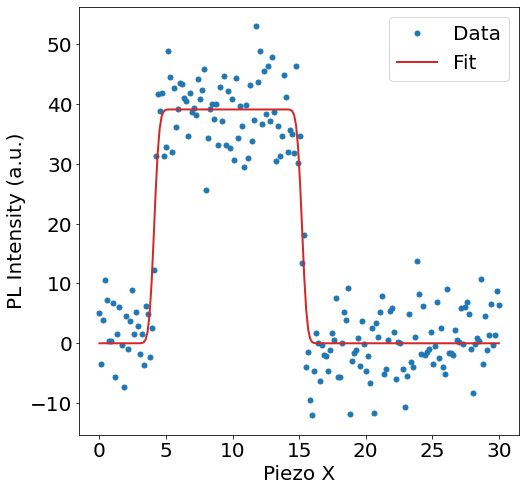

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.optimize import curve_fit

def generate_equation(x, a, w, d, c):
    """
    a: amplitude
    w: fwhm of the gaussian
    d: width of the top-hat
    c: center of the top-hat
    """
    return 0.25 * a * w * np.sqrt(np.pi / np.log(2)) * (
        erf(np.sqrt(np.log(2)) * (-2 * c + d + 2 * x) / w) +
        erf(np.sqrt(np.log(2)) * (2 * c + d - 2 * x) / w)
    )

def fit_equation(x, a, d, c):
    """
    a: amplitude
    d: width of the top-hat
    c: center of the top-hat
    """
    w = 0.7
    return 0.25 * a * w * np.sqrt(np.pi / np.log(2)) * (
        erf(np.sqrt(np.log(2)) * (-2 * c + d + 2 * x) / w) +
        erf(np.sqrt(np.log(2)) * (2 * c + d - 2 * x) / w)
    )

# Generate some example data
fitting_range = 30  # nm
x_data = np.linspace(0, fitting_range, 200)
y_true = generate_equation(x_data, 92, 0.4, 11, 9.7) + np.random.normal(0, 5, len(x_data))

# Fit the data to the model
p0 = [100, 10, 8]  # Initial guess for parameters
params, covariance = curve_fit(fit_equation, x_data, y_true, p0=p0)
uncertainties = np.sqrt(np.diag(covariance))

print(params)
print(uncertainties)

# Plot the original data and the fitted function
# plt.plot(x_data, y_true, label='Data')
# plt.plot(x_data, fit_equation(x_data, *params), label='Fit')
plt.rcParams.update({'font.size': 20})
cm = 1/2.54 
plt.figure(figsize=(20*cm, 20*cm))
plt.xlabel('Piezo X')
plt.ylabel('PL Intensity (a.u.)')
plt.plot(x_data, y_true, 'C0o', markersize = 5, label='Data')  # Blue dots for data
plt.plot(x_data, fit_equation(x_data, *params), 'C3-', lw = 2, label='Fit')  # Red line for fit
plt.legend()
plt.show()
